# Data analysis of houses pricing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

## Plotting relation between the area of living room to the area of the whole house above

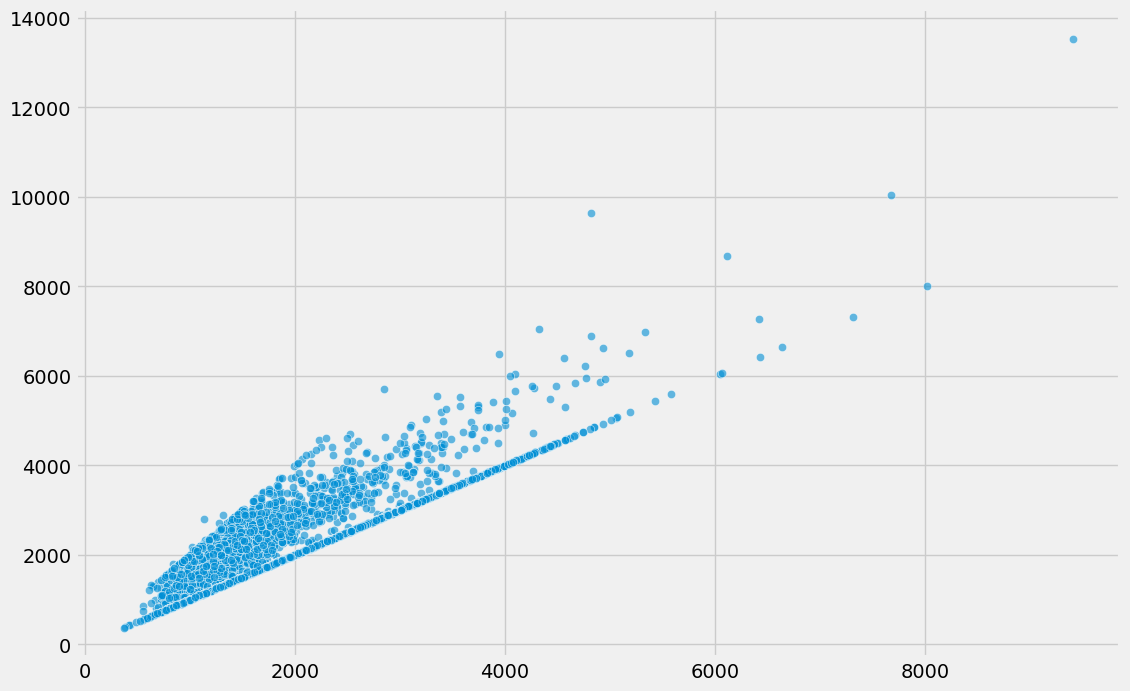

In [50]:
plt.figure(figsize=(12, 8))
plt.scatter(df['sqft_above'],df['sqft_living'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.show()

## Price range across different cities

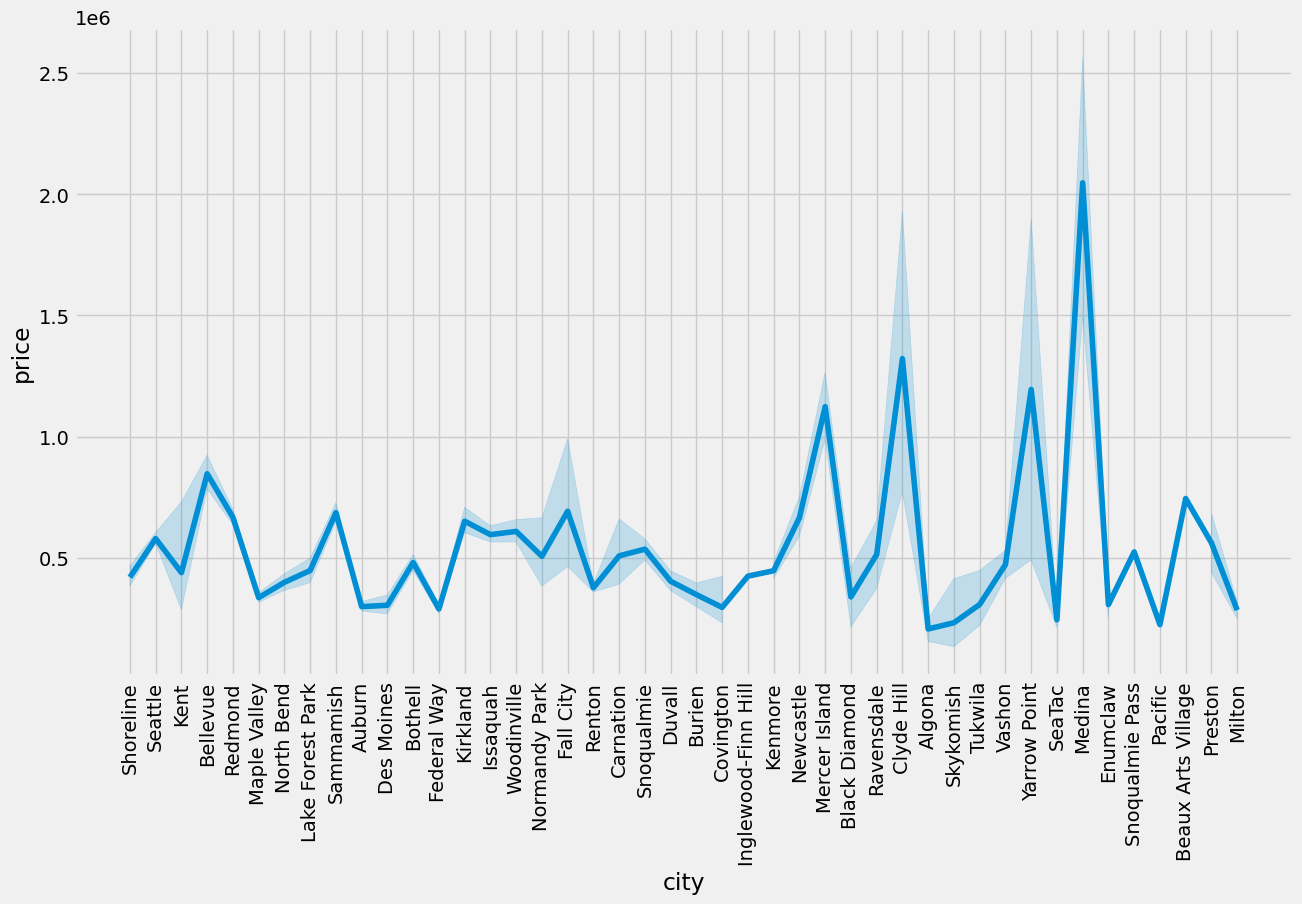

In [15]:
plt.figure(figsize=(14,8))
sns.lineplot(x='city',y='price',data=df)
plt.xticks(rotation=90)
plt.xlabel('city')
plt.ylabel('price')
plt.show()

## Average price trend over time

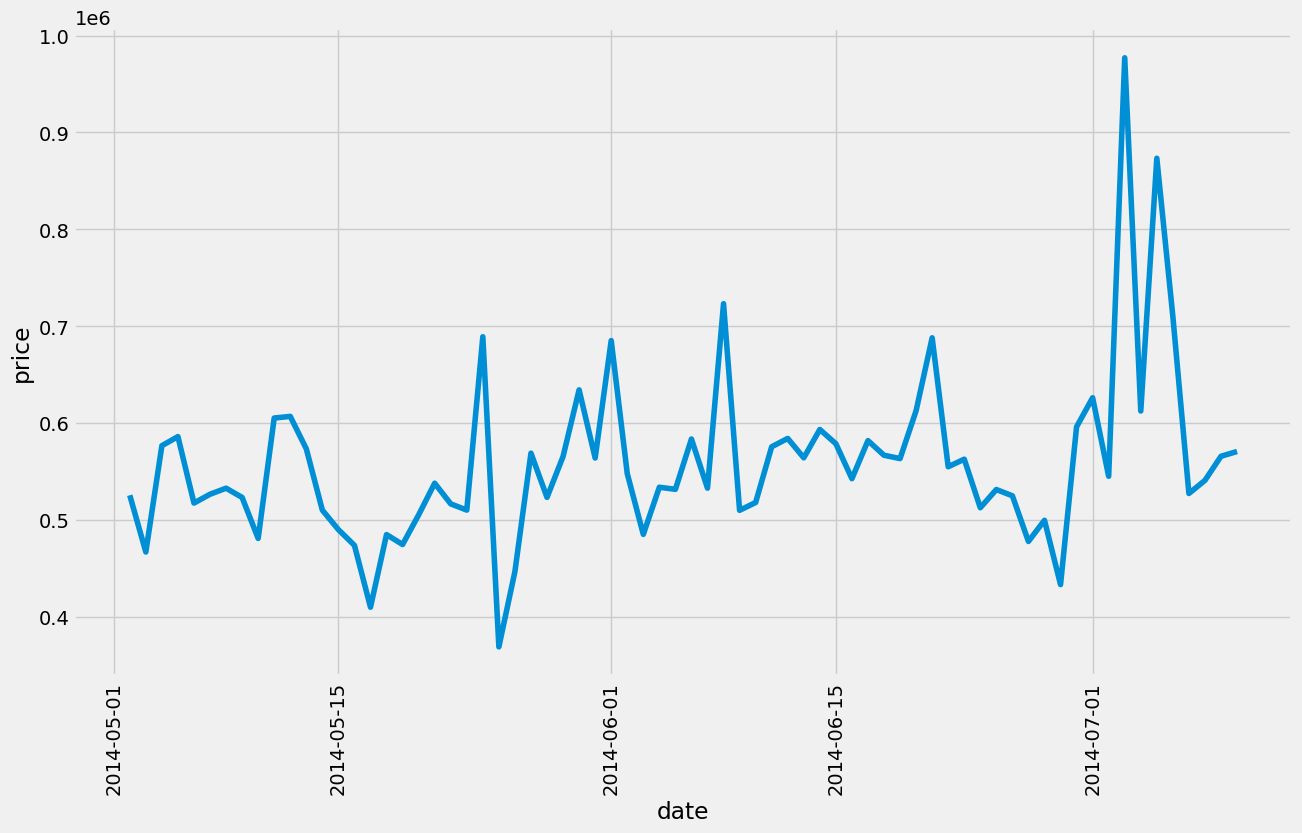

In [20]:
df['date'] = pd.to_datetime(df['date'])
average_price_trend = df.groupby('date')['price'].mean().reset_index()
plt.figure(figsize=(14,8))
sns.lineplot(x='date',y='price',data=average_price_trend)
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('price')
plt.show()

## Frequency of Properties by Number of Bedrooms

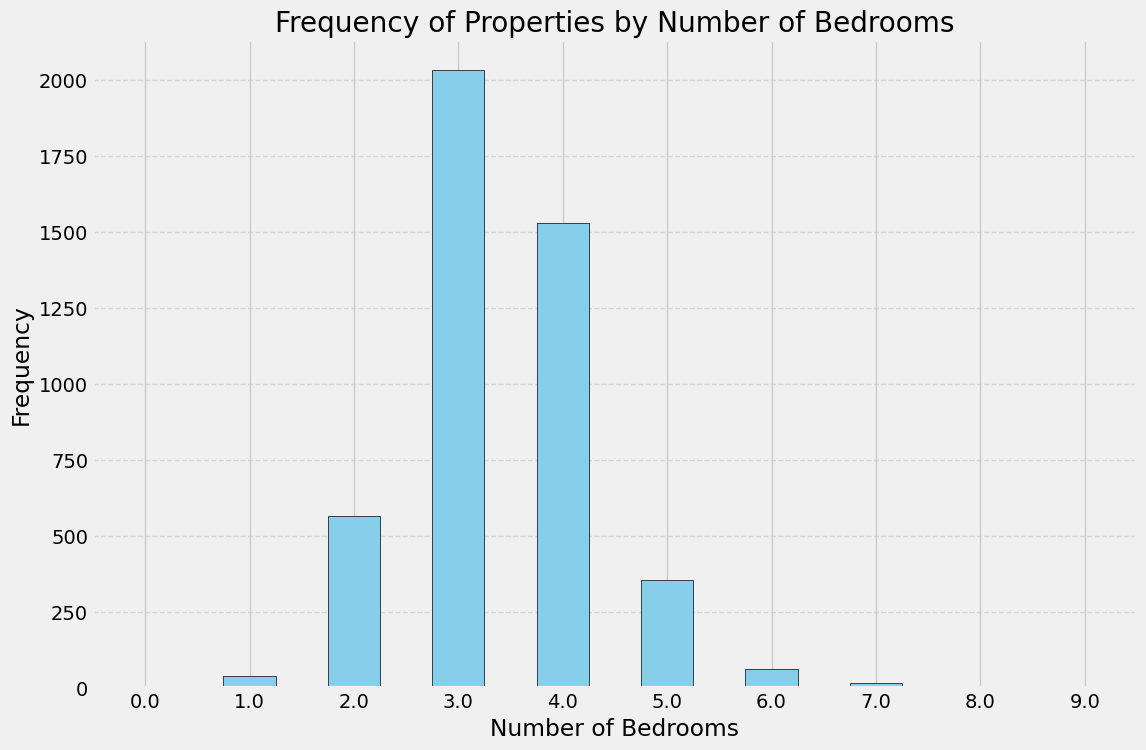

In [25]:
bedroom_counts = df['bedrooms'].value_counts().sort_index()
plt.figure(figsize=(12, 8))
bedroom_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Properties by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Simple linear regression function

In [23]:
def estimate_Coef(x,y):
    n = np.size(x)

    mean_of_x = np.mean(x)
    mean_of_y = np.mean(y)

    SS_xy = np.sum(y*x) - n*mean_of_x*mean_of_y
    SS_xx = np.sum(x*x) - n*mean_of_x*mean_of_x

    b_1 = SS_xy/SS_xx
    b_0 = mean_of_y - b_1*mean_of_x

    return(b_0,b_1)

def plot_regression_line(x, y, b, x_label, y_label):
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y, color = "m", marker = "o", s = 30)

    y_pred = b[0] + b[1]*x

    plt.plot(x, y_pred, color = "g")

    plt.xlabel(x_label)
    plt.ylabel(y_label)

## Linear regression between year of renovation and condition of the house

(3.5561936772753313, -0.00012917818416574177)


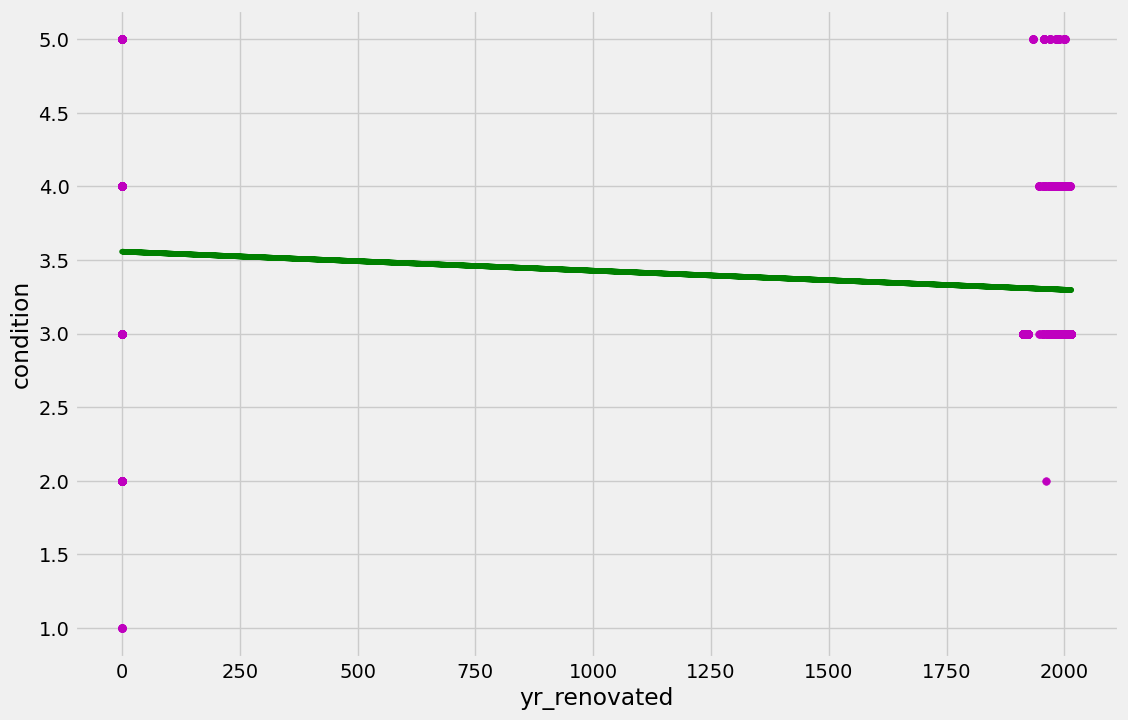

In [24]:
x = np.array(df['yr_renovated'])
y = np.array(df['condition'])
b = estimate_Coef(x,y)
plot_regression_line(x,y,b,'yr_renovated','condition')
print(b)

## Linear regression between price and area of above surface of house

(112724.24865773809, 240.38036918688422)


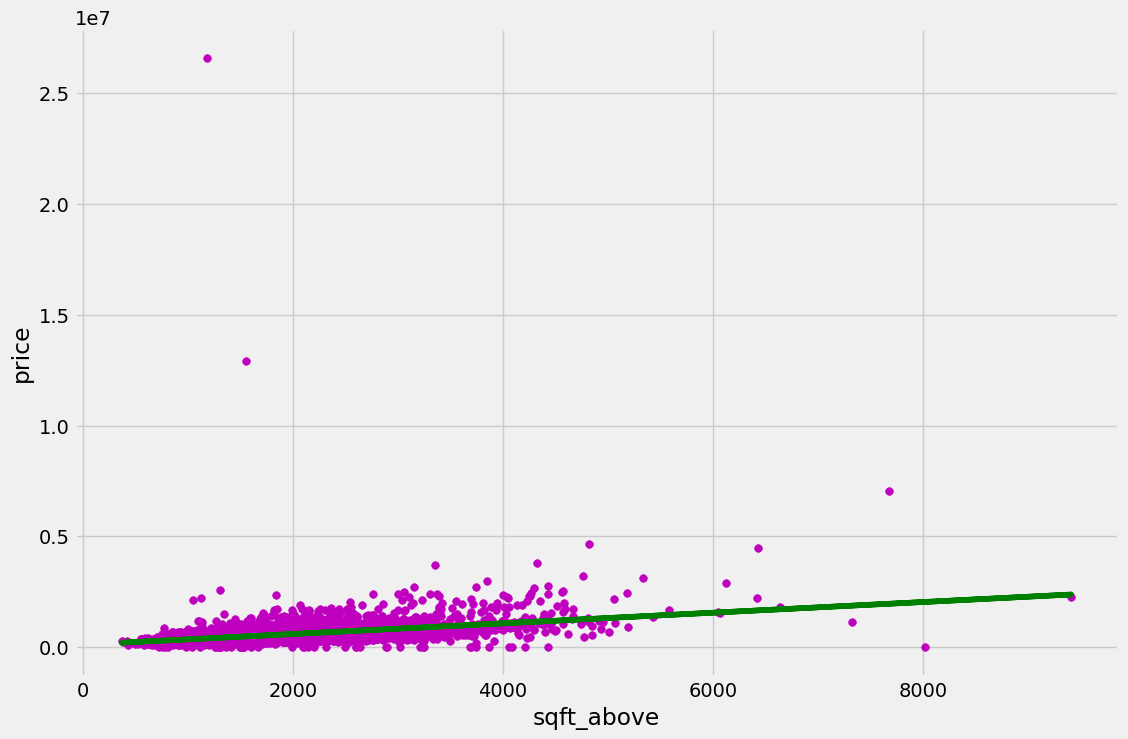

In [26]:
x = np.array(df['sqft_above'])
y = np.array(df['price'])
b = estimate_Coef(x,y)
plot_regression_line(x,y,b,'sqft_above','price')
print(b)

## Multiple linear regression to predict the price values

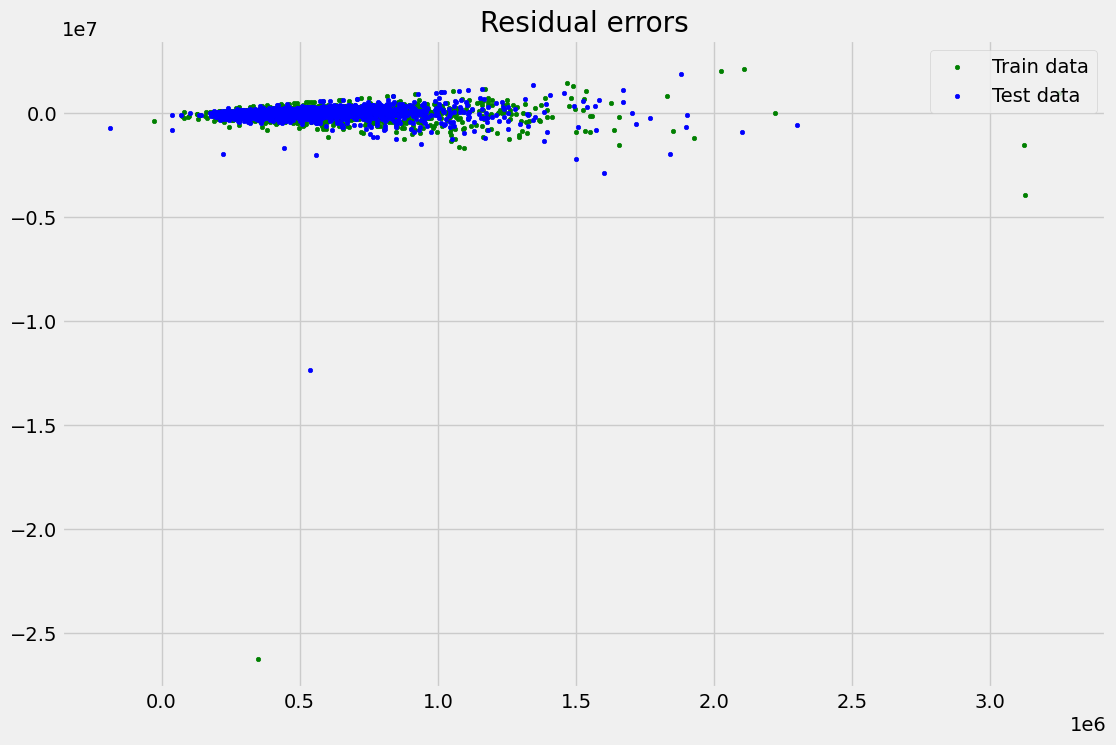

In [37]:
X = df.drop(['price','date','yr_built','yr_renovated','street','city','statezip','country'],
                  axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual errors")
plt.show()